# Welcome to the money shot
**In this markdown we**
- graph projected SLR for 2030 to 2100
- make a dataframe called `slr_df` which contains the 17th, 50th, and 83rd quantile of SLR for each scenario for each decade 2030-2100
- make a dataframe called `slr_df_x` where `x` is the year for each decade from 2030-2100
- make a graph for proof of quantile concept

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [2]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM
using KernelDensity
using Optim

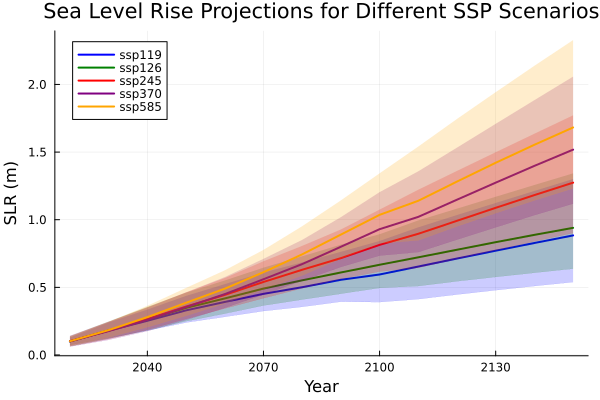

In [ ]:
# get slr data
slr = DataFrame(XLSX.readtable("data/ipcc_ar6_sea_level_projection_psmsl_id_12.xlsx", "Total"))

# years range
years = 2020:10:2150

# unique scenarios
scenarios = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"]

colors = [:blue, :green, :red, :purple, :orange]

# plotting
p = plot(
    xlabel="Year",
    ylabel="SLR (m)",
    title="Sea Level Rise Projections for Different SSP Scenarios",
    legend=:topleft # This moves the legend to the top-left corner
)

# Loop through each scenario and plot the data
for (i, scenario) in enumerate(scenarios)
    # Filter data for 17th, 50th, and 83rd quantiles for the current scenario
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    # Extract the sea level data for the 17th, 50th, and 83rd quantiles
    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    # Plot the 50th quantile
    plot!(p, years, sea_levels_50, label="$scenario", color=colors[i], lw=2)

    # Plot the shaded area between the 17th and 83rd quantiles
    plot!(p, years, sea_levels_25, fillrange=sea_levels_75, label = nothing, color=colors[i], lw=0, fillalpha=0.2)
end

# Display the plot
display(p)


In [4]:
years_all = []
scenarios_all = []
quantile_17_all = []
quantile_50_all = []
quantile_83_all = []

# Loop through each scenario and collect the data for each quantile
for scenario in scenarios
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    append!(years_all, years)
    append!(scenarios_all, fill(scenario, length(years)))
    append!(quantile_17_all, sea_levels_25)
    append!(quantile_50_all, sea_levels_50)
    append!(quantile_83_all, sea_levels_75)
end

# Create the DataFrame
slr_df = DataFrame(
    Year = years_all,
    Scenario = scenarios_all,
    Quantile_17 = quantile_17_all,
    Quantile_50 = quantile_50_all,
    Quantile_83 = quantile_83_all
)

println(slr_df)

70×5 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83 
     │ Any   Any       Any          Any          Any         
─────┼───────────────────────────────────────────────────────
   1 │ 2020  ssp119    0.074        0.1          0.13
   2 │ 2030  ssp119    0.126        0.18         0.241
   3 │ 2040  ssp119    0.181        0.253        0.336
   4 │ 2050  ssp119    0.24         0.33         0.437
   5 │ 2060  ssp119    0.282        0.392        0.524
   6 │ 2070  ssp119    0.325        0.452        0.61
   7 │ 2080  ssp119    0.356        0.501        0.685
   8 │ 2090  ssp119    0.394        0.556        0.763
   9 │ 2100  ssp119    0.391        0.595        0.843
  10 │ 2110  ssp119    0.413        0.654        0.944
  11 │ 2120  ssp119    0.447        0.713        1.035
  12 │ 2130  ssp119    0.479        0.771        1.124
  13 │ 2140  ssp119    0.51         0.828        1.213
  14 │ 2150  ssp119    0.539        0.884        1.301
  15 │ 2020  ssp126    0.065   

In [5]:
slr_2030_df = slr_df[slr_df.Year .== 2030, :]
slr_2040_df = slr_df[slr_df.Year .== 2040, :]
slr_2050_df = slr_df[slr_df.Year .== 2050, :]
slr_2060_df = slr_df[slr_df.Year .== 2060, :]
slr_2070_df = slr_df[slr_df.Year .== 2070, :]
slr_2080_df = slr_df[slr_df.Year .== 2080, :]
slr_2090_df = slr_df[slr_df.Year .== 2090, :]
slr_2100_df = slr_df[slr_df.Year .== 2100, :]

5×5 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83 
     │ Any   Any       Any          Any          Any         
─────┼───────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843
   2 │ 2100  ssp126    0.496        0.667        0.893
   3 │ 2100  ssp245    0.617        0.814        1.075
   4 │ 2100  ssp370    0.735        0.93         1.204
   5 │ 2100  ssp585    0.826        1.036        1.343

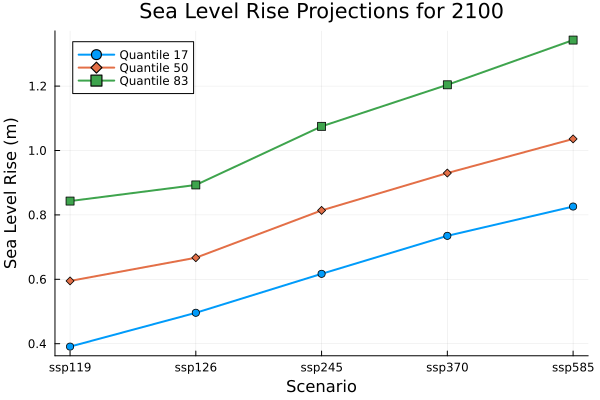

In [6]:
scenarios = slr_2030_df.Scenario
quantile_17 = slr_2100_df.Quantile_17
quantile_50 = slr_2100_df.Quantile_50
quantile_83 = slr_2100_df.Quantile_83

# Create the plot
plot(scenarios, quantile_17, label="Quantile 17", lw=2, marker=:circle)
plot!(scenarios, quantile_50, label="Quantile 50", lw=2, marker=:diamond)
plot!(scenarios, quantile_83, label="Quantile 83", lw=2, marker=:square)

# Add titles and labels
xlabel!("Scenario")
ylabel!("Sea Level Rise (m)")
title!("Sea Level Rise Projections for 2100")

# Now! We make distributions
**In this markdown we**
- add two rows to each df `slr_df_x`; one for mean and one for std in function `add_mean_std`
- make the mean and std a noraml distribution and then combine them in function `mix_distributions`
- apply for good, med, bad and equal

In [7]:
function add_mean_std(df::DataFrame, cols::Vector{Symbol})
    df.mean = [mean([row[c] for c in cols]) for row in eachrow(df)]
    df.std = [std([row[c] for c in cols]) for row in eachrow(df)]
    
    return df
end

function mix_distributions(df::DataFrame, weights::Vector{Float64})
    # Ensure the number of weights matches the number of rows in the DataFrame
    if length(weights) != nrow(df)
        error("Number of weights must match the number of rows in the DataFrame.")
    end
    
    means = df.mean
    stds = df.std
    
    # create a vector of Normal distributions
    distributions = [Normal(mean, std) for (mean, std) in zip(means, stds)]
    
    # mix the model
    mixture_model = MixtureModel(distributions, weights)
    
    return mixture_model
end


mix_distributions (generic function with 1 method)

In [8]:
slr_2030_df = add_mean_std(slr_2030_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2040_df = add_mean_std(slr_2040_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2050_df = add_mean_std(slr_2050_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2060_df = add_mean_std(slr_2060_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2070_df = add_mean_std(slr_2070_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2080_df = add_mean_std(slr_2080_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2090_df = add_mean_std(slr_2090_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2100_df = add_mean_std(slr_2100_df, [:Quantile_17, :Quantile_50, :Quantile_83])


5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std    ⋯
     │ Any   Any       Any          Any          Any          Float64   Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843        0.609667  0.2263 ⋯
   2 │ 2100  ssp126    0.496        0.667        0.893        0.685333  0.1991
   3 │ 2100  ssp245    0.617        0.814        1.075        0.835333  0.2297
   4 │ 2100  ssp370    0.735        0.93         1.204        0.956333  0.2356
   5 │ 2100  ssp585    0.826        1.036        1.343        1.06833   0.2600 ⋯
                                                                1 column omitted

In [9]:
# weights
weights_good = [3/5, 1/5, 0.5/5, 0.25/5, 0.25/5]
weights_med = [0.25/5, 0.75/5, 3/5, 0.75/5, 0.25/5]
weights_bad = [0.25/5, 0.25/5, 0.5/5, 1/5, 3/5]
weights_eq = [1/5, 1/5, 1/5, 1/5, 1/5]

5-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.2
 0.2

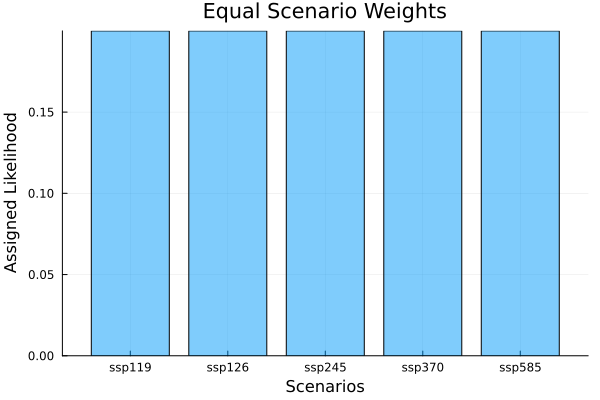

In [10]:
using Plots

# Define weights
weights_good = [3/5, 1/5, 0.5/5, 0.25/5, 0.25/5]
weights_med = [0.25/5, 0.75/5, 3/5, 0.75/5, 0.25/5]
weights_bad = [0.25/5, 0.25/5, 0.5/5, 1/5, 3/5]
weights_eq = [1/5, 1/5, 1/5, 1/5, 1/5]

# Categories for the weights
categories = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"]

# Create separate bar plots for each weight distribution
plot(weights_eq, 
    seriestype=:bar, 
    xlabel="Scenarios", 
    ylabel="Assigned Likelihood", 
    title="Equal Scenario Weights", 
    xticks=(1:5, categories),
    fillalpha=0.5, 
    legend=false)


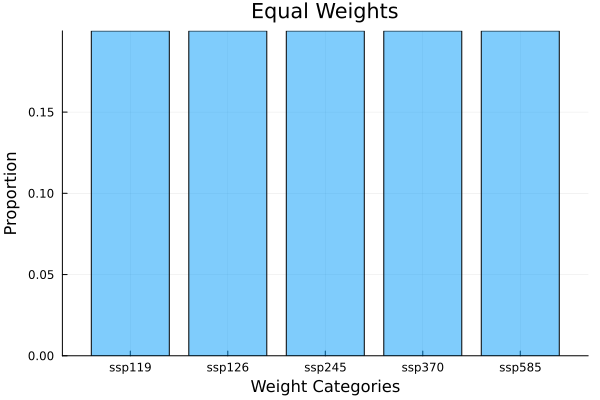

In [11]:

plot(weights_med, 
    seriestype=:bar, 
    xlabel="Weight Categories", 
    ylabel="Proportion", 
    title="Medium Weights", 
    xticks=(1:5, categories),
    fillalpha=0.5, 
    legend=false)

plot(weights_bad, 
    seriestype=:bar, 
    xlabel="Weight Categories", 
    ylabel="Proportion", 
    title="Bad Weights", 
    xticks=(1:5, categories),
    fillalpha=0.5, 
    legend=false)

plot(weights_eq, 
    seriestype=:bar, 
    xlabel="Weight Categories", 
    ylabel="Proportion", 
    title="Equal Weights", 
    xticks=(1:5, categories),
    fillalpha=0.5, 
    legend=false)


In [4]:

samples = rand(mixture_model_2030_good, 1000)
    
# Create a range of values for the x-axis (for plotting the PDF)
x_range = range(minimum(samples), stop=maximum(samples), length=1000)
    
# Calculate the PDF for the mixture model at each x value
pdf_values = pdf(mixture_model_2030_good, x_range)
    

samples_b = rand(mixture_model_2100_bad, 1000)
    
# Create a range of values for the x-axis (for plotting the PDF)
x_range_b = range(minimum(samples_b), stop=maximum(samples_b), length=1000)
    
# Calculate the PDF for the mixture model at each x value
pdf_values_b = pdf(mixture_model_2100_bad, x_range_b)
    
# Plot the PDF
plot(x_range, pdf_values, xlabel="SLR", label="PDF for 2030 Good Case", title="PDF",lw=2)
# Plot the PDF
plot!(x_range_b, pdf_values_b, xlabel="SLR",  label="PDF for 2100 Bad Case", lw=2)




UndefVarError: UndefVarError: `mixture_model_2030_good` not defined

In [13]:
mean(samples_b)

UndefVarError: UndefVarError: `samples_b` not defined

In [14]:
# 2030 gmbe
# good
mixture_model_2030_good = mix_distributions(slr_2030_df, weights_good)
# medium
mixture_model_2030_med = mix_distributions(slr_2030_df, weights_med)
# bad
mixture_model_2030_bad = mix_distributions(slr_2030_df, weights_bad)
# weights_eq
mixture_model_2030_eq = mix_distributions(slr_2030_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.18233333333333332, σ=0.05753549628997157)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.18366666666666664, σ=0.06351640208114226)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.18166666666666664, σ=0.06351640208114226)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.17833333333333332, σ=0.06700994951000436)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.18600000000000003, σ=0.05702630971753301)


In [15]:
# 2040 gmbe
# good
mixture_model_2040_good = mix_distributions(slr_2040_df, weights_good)
# medium
mixture_model_2040_med = mix_distributions(slr_2040_df, weights_med)
# bad
mixture_model_2040_bad = mix_distributions(slr_2040_df, weights_bad)
# weights_eq
mixture_model_2040_eq = mix_distributions(slr_2040_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.25666666666666665, σ=0.07756502648316015)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.26766666666666666, σ=0.0865582655402321)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.26866666666666666, σ=0.08303212229814033)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.26266666666666666, σ=0.0870306459434453)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.2833333333333333, σ=0.07905272502155339)


In [ ]:
# 2040 gmbe
# good
mixture_model_2040_good = mix_distributions(slr_2040_df, weights_good)
# medium
mixture_model_2040_med = mix_distributions(slr_2040_df, weights_med)
# bad
mixture_model_2040_bad = mix_distributions(slr_2040_df, weights_bad)
# weights_eq
mixture_model_2040_eq = mix_distributions(slr_2040_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.3356666666666667, σ=0.09862217465323574)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.353, σ=0.10558882516630252)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.3626666666666667, σ=0.09808329793259062)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.3586666666666667, σ=0.10208003396028695)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.39066666666666666, σ=0.10307925753192702)


In [17]:
# 2060 gmbe
# good
mixture_model_2060_good = mix_distributions(slr_2060_df, weights_good)
# medium
mixture_model_2060_med = mix_distributions(slr_2060_df, weights_med)
# bad
mixture_model_2060_bad = mix_distributions(slr_2060_df, weights_bad)
# weights_eq
mixture_model_2060_eq = mix_distributions(slr_2060_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.3993333333333333, σ=0.12116655204029426)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.425, σ=0.12264990827554666)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.4523333333333333, σ=0.11273124382057234)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.4583333333333333, σ=0.11372921055442761)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.49899999999999994, σ=0.122747708736253)


In [18]:
# 2070 gmbe
# good
mixture_model_2070_good = mix_distributions(slr_2070_df, weights_good)
# medium
mixture_model_2070_med = mix_distributions(slr_2070_df, weights_med)
# bad
mixture_model_2070_bad = mix_distributions(slr_2070_df, weights_bad)
# weights_eq
mixture_model_2070_eq = mix_distributions(slr_2070_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.4623333333333333, σ=0.14278071765239636)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.501, σ=0.1402676013910554)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.551, σ=0.1368320137979413)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.5726666666666667, σ=0.13245502381311677)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.625, σ=0.1459349170006959)


In [19]:
# 2080 gmbe
# good
mixture_model_2080_good = mix_distributions(slr_2080_df, weights_good)
# medium
mixture_model_2080_med = mix_distributions(slr_2080_df, weights_med)
# bad
mixture_model_2080_bad = mix_distributions(slr_2080_df, weights_bad)
# weights_eq
mixture_model_2080_eq = mix_distributions(slr_2080_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.514, σ=0.1648848082753533)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.564, σ=0.16033714479184166)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.6433333333333334, σ=0.15742405576446486)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.691, σ=0.1513968295572929)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.7613333333333333, σ=0.18261799838278078)


In [20]:
# 2090 gmbe
# good
mixture_model_2090_good = mix_distributions(slr_2090_df, weights_good)
# medium
mixture_model_2090_med = mix_distributions(slr_2090_df, weights_med)
# bad
mixture_model_2090_bad = mix_distributions(slr_2090_df, weights_bad)
# weights_eq
mixture_model_2090_eq = mix_distributions(slr_2090_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.5710000000000001, σ=0.18495675170158024)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.6263333333333333, σ=0.18205035933316177)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.7356666666666666, σ=0.1832930258720537)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.8233333333333333, σ=0.18510627578051836)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.915, σ=0.2165848563496534)


In [69]:
# 2100 gmbe
# good
mixture_model_2100_good = mix_distributions(slr_2100_df, weights_good)
# medium
mixture_model_2100_med = mix_distributions(slr_2100_df, weights_med)
# bad
mixture_model_2100_bad = mix_distributions(slr_2100_df, weights_bad)
# weights_eq
mixture_model_2100_eq = mix_distributions(slr_2100_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.6096666666666667, σ=0.22635665073801856)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.6853333333333333, σ=0.19913395826260608)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.8353333333333334, σ=0.22974406049631257)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.9563333333333333, σ=0.23560631004566351)
components[5] (prior = 0.2000): Normal{Float64}(μ=1.0683333333333334, σ=0.2600121792019238)


# Okay. Now we will sample from the distributions and get our expected exceedence depending on our outlook on life and which year we are protecting against
**In this markdown we**
- first sample from mixture_model_2030_good to demonstrate the idea and append it to our historical data
- calculate exceedence on 90th

In [70]:
good_2030_samples = rand(mixture_model_2030_good, 1000)

1000-element Vector{Float64}:
 0.2569811076430505
 0.1899461851664011
 0.24981832849634267
 0.16826783921071095
 0.22624786220901993
 0.22468127993906822
 0.13610295638562325
 0.115005098701036
 0.11778995865315839
 0.20765145696921944
 ⋮
 0.14066728383739266
 0.2441347684909199
 0.22245653023716205
 0.1268901704080696
 0.1536072148438172
 0.24152422571681703
 0.2157967638984612
 0.18519359752512873
 0.17229104671484116

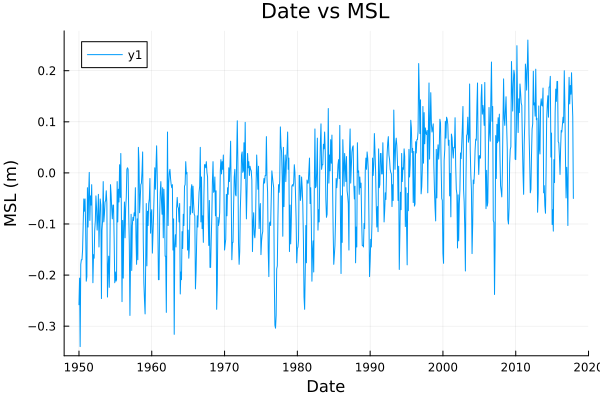

In [71]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  
rename!(history, Symbol("MSL (m)") => :MSL)
plot(history.Date, history."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))


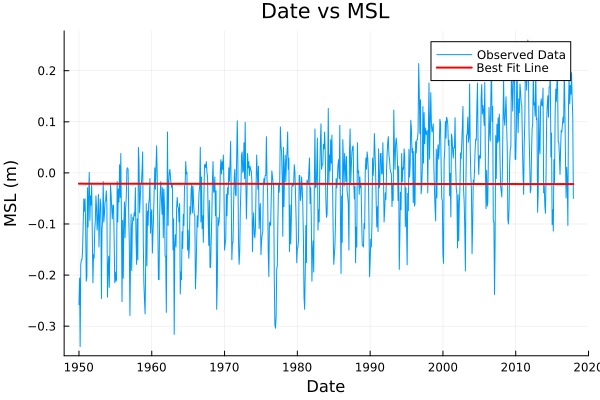

In [24]:

# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Convert Date to numerical representation (days since the first date)
history.numerical_date = Dates.value.(history.Date)

# Rename the column for easier access
rename!(history, Symbol("MSL (m)") => :MSL)

# Fit a linear regression model
model = lm(@formula(MSL ~ numerical_date), history)

# Extract the slope and intercept
intercept = coef(model)[1]
slope = coef(model)[2]

# Generate fitted values for the line of best fit
history.fitted_MSL = intercept .+ slope .* history.numerical_date

# Plot the original data
p = plot(history.Date, history.MSL, xlabel="Date", ylabel="MSL (m)", title="Date vs MSL",
         xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)),
         label="Observed Data", legend=:topright)

# Add the line of best fit
plot!(history.Date, history.fitted_MSL, label="Best Fit Line", lw=2, color=:red)


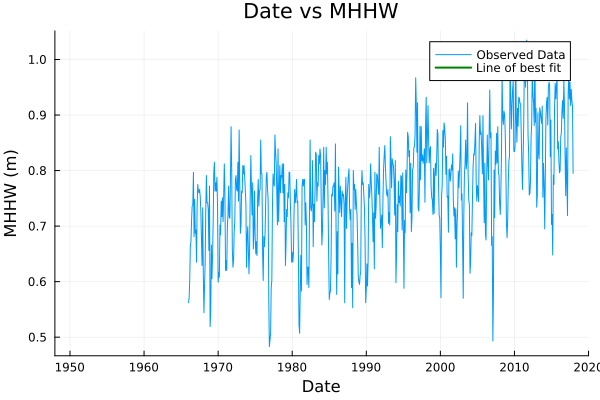

In [25]:
using CSV
using DataFrames
using Plots
using GLM
using Dates

# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Normalize the Date by subtracting the minimum date
history.numerical_date = Dates.value.(history.Date) .- Dates.value(minimum(history.Date))

# Rename the column for easier access
rename!(history, Symbol("MHHW (m)") => :MHHW)

# Fit a linear regression model
model = lm(@formula(MHHW ~ numerical_date), history)

# Extract the slope and intercept
intercept = coef(model)[1]
slope = coef(model)[2]

# Generate fitted values for the line of best fit
history.fitted_MHHW = intercept .+ slope .* history.numerical_date

# Plot the original data
p = plot(history.Date, history.MHHW, xlabel="Date", ylabel="MHHW (m)", title="Date vs MHHW",
         xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)),
         label="Observed Data", legend=:topright)

# Add the line of best fit
plot!(history.Date, history.fitted_MHHW, label="Line of best fit", lw=2, color=:green)


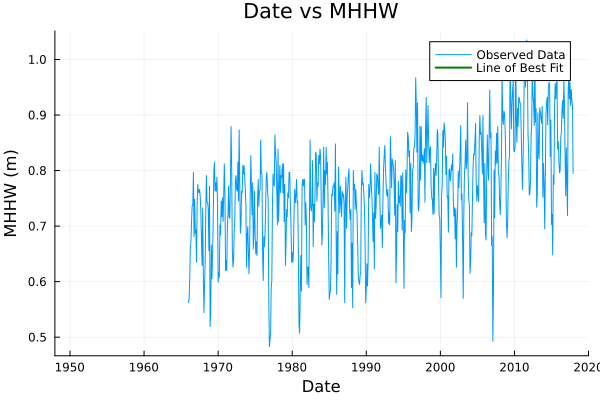

In [26]:
using CSV
using DataFrames
using Plots
using GLM
using Dates

# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Rename the column for easier access
rename!(history, Symbol("MHHW (m)") => :MHHW)

# Filter out rows where MHHW is NaN
history = dropmissing(history, :MHHW)

# Normalize the Date by subtracting the minimum date
history.numerical_date = Dates.value.(history.Date) .- Dates.value(minimum(history.Date))

# Fit a linear regression model
model = lm(@formula(MHHW ~ numerical_date), history)

# Extract the slope and intercept
intercept = coef(model)[1]
slope = coef(model)[2]

# Generate fitted values for the line of best fit
history.fitted_MHHW = intercept .+ slope .* history.numerical_date

# Plot the original data
p = plot(history.Date, history.MHHW, xlabel="Date", ylabel="MHHW (m)", title="Date vs MHHW",
         xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)),
         label="Observed Data", legend=:topright)

# Add the line of best fit
plot!(history.Date, history.fitted_MHHW, label="Line of Best Fit", lw=2, color=:green)


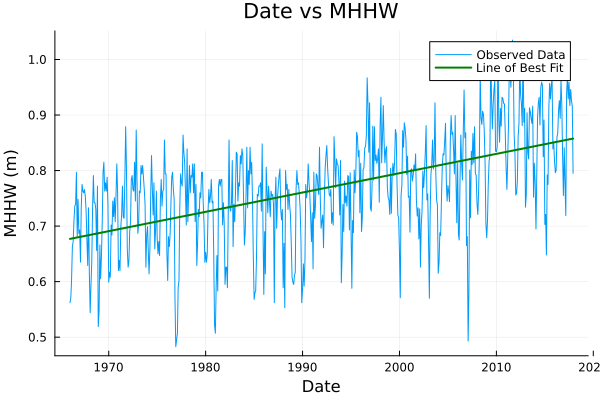

In [27]:
using CSV
using DataFrames
using Plots
using GLM
using Dates

# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Rename the column for easier access
rename!(history, Symbol("MHHW (m)") => :MHHW)

# Filter out rows where MHHW is NaN
history = filter(row -> !isnan(row.MHHW), history)

# Normalize the Date by subtracting the minimum date
history.numerical_date = Dates.value.(history.Date) .- Dates.value(minimum(history.Date))

# Fit a linear regression model
model = lm(@formula(MHHW ~ numerical_date), history)

# Extract the slope and intercept
intercept = coef(model)[1]
slope = coef(model)[2]

# Generate fitted values for the line of best fit
history.fitted_MHHW = intercept .+ slope .* history.numerical_date

# Plot the original data
p = plot(history.Date, history.MHHW, xlabel="Date", ylabel="MHHW (m)", title="Date vs MHHW",
         xticks=(collect(Date(1970, 1, 1):Year(10):Date(2020, 1, 1)), string.(1970:10:2020)),
         label="Observed Data", legend=:topright)

# Add the line of best fit
plot!(history.Date, history.fitted_MHHW, label="Line of Best Fit", lw=2, color=:green)


In [28]:
using CSV
using DataFrames
using GLM
using Dates

# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Rename columns for easier access
rename!(history, Symbol("MHHW (m)") => :MHHW, Symbol("MSL (m)") => :MSL)

# Filter out rows with NaN in MHHW or MSL
history = filter(row -> !isnan(row.MHHW) && !isnan(row.MSL), history)

# Normalize the date for fitting
history.numerical_date = Dates.value.(history.Date) .- Dates.value(minimum(history.Date))

# Fit linear regression models for MSL and MHHW
model_msl = lm(@formula(MSL ~ numerical_date), history)
model_mhhw = lm(@formula(MHHW ~ numerical_date), history)

# Extract coefficients
intercept_msl, slope_msl = coef(model_msl)
intercept_mhhw, slope_mhhw = coef(model_mhhw)

# Define the time range for averaging
start_date = minimum(history.numerical_date)
end_date = maximum(history.numerical_date)

# Calculate the average value of each linear model over the time range
average_msl = mean(intercept_msl .+ slope_msl .* range(start_date, end_date, length=100))
average_mhhw = mean(intercept_mhhw .+ slope_mhhw .* range(start_date, end_date, length=100))

# Calculate the difference
difference = average_mhhw - average_msl

println("Average MSL: $average_msl")
println("Average MHHW: $average_mhhw")
println("Difference: $difference")


Average MSL: 0.00040882565950978167
Average MHHW: 0.7672888141785662
Difference: 0.7668799885190565


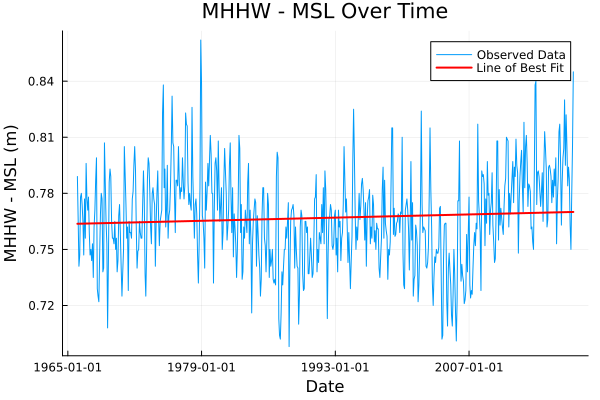

In [3]:
# Load the data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

# Convert Date column to Date format
history.Date = Date.(history.Date, "yyyy/mm/dd")

# Rename columns for easier access
rename!(history, Symbol("MHHW (m)") => :MHHW, Symbol("MSL (m)") => :MSL)

# Filter out rows with NaN in MHHW or MSL
history = filter(row -> !isnan(row.MHHW) && !isnan(row.MSL), history)

# Calculate the difference MHHW - MSL
history.diff = history.MHHW .- history.MSL

# Normalize the date for sinusoidal fitting
history.numerical_date = Dates.value.(history.Date) .- Dates.value(minimum(history.Date))

# Define a sinusoidal model
function sinusoidal_model(x, params)
    # params: [amplitude, frequency, phase, offset]
    amplitude, frequency, phase, offset = params
    return amplitude * sin.(2 * π * frequency * x .+ phase) .+ offset
end

# Fit the sinusoidal model to the data
function fit_sinusoidal(x, y)
    # Initial parameter guesses: amplitude, frequency, phase, offset
    initial_params = [std(y), 1 / (365 * 24 * 60 * 60), 0, mean(y)]
    
    # Define the loss function
    function loss(params)
        predictions = sinusoidal_model(x, params)
        return sum((predictions .- y).^2)
    end
    
    # Perform optimization
    best_params = optimize(loss, initial_params).minimizer
    return best_params
end

# Fit the model to the data
params = fit_sinusoidal(history.numerical_date, history.diff)

# Generate the fitted values
history.fitted_diff = sinusoidal_model(history.numerical_date, params)

# Plot the data and the sinusoidal fit
plot(history.Date, history.diff, label="Observed Data", xlabel="Date", ylabel="MHHW - MSL (m)", 
     title="MHHW - MSL Over Time", legend=:topright)
plot!(history.Date, history.fitted_diff, label="Line of Best Fit", color=:red, lw=2)

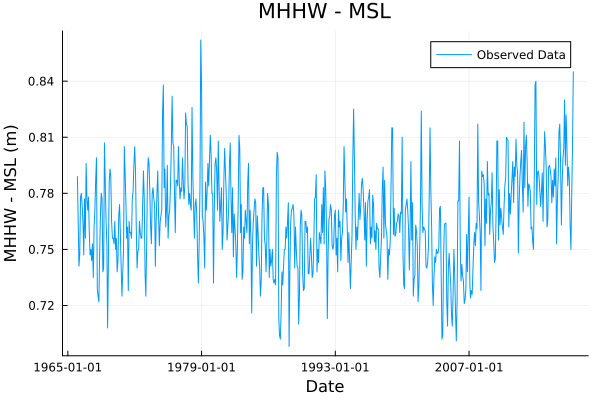

In [30]:
# Normalize the date (convert to days)
history.normalized_date = history.numerical_date ./ (24 * 60 * 60)  # Convert from seconds to days

# Fit sinusoidal model
initial_params = [std(history.diff), 1 / 365, 0, mean(history.diff)]  # Adjust initial guesses

# Define the loss function
function loss(params)
    predictions = sinusoidal_model(history.normalized_date, params)
    return sum((history.diff .- predictions).^2)
end

# Perform optimization
using Optim
result = optimize(loss, initial_params)
best_params = result.minimizer

# Generate fitted values
history.fitted_diff = sinusoidal_model(history.normalized_date, best_params)

# Plot the data and sinusoidal fit
plot(history.Date, history.diff, label="Observed Data", xlabel="Date", ylabel="MHHW - MSL (m)", 
     title="MHHW - MSL", legend=:topright)
# plot!(history.Date, history.fitted_diff, label="Sinusoidal Fit", color=:red, lw=2)


In [31]:
# # try some exceedence stuff
# function exceedance_threshold(data)
#     return quantile(data, 0.9)
# end


In [72]:
msl_data = history.MSL  
threshold = exceedance_threshold(msl_data)
println("Exceedance Threshold (90th percentile): ", threshold)

UndefVarError: UndefVarError: `exceedance_threshold` not defined

# Now we Monte Carlo

In [33]:
function mc_exceed(distribution, data, year)
    n = 1000
    ev = []
    for i in 1:n
        samples = rand(distribution, 1000)
        new_date = Date("$year-01-01")  
        new_row = (Date = new_date, MSL = mean(samples))
        
        temp_data = data # this way i don't modify original data
        temp_data = push!(temp_data, new_row)
        e = exceedance_threshold(temp_data)
        push!(ev, e)
    end
    return mean(ev)
end


mc_exceed (generic function with 1 method)

In [34]:
function nmc(distribution, data, year)
    samples = rand(distribution, 1000)
    new_date = Date("$year-01-01")  
    new_row = (Date = new_date, MSL = mean(samples))
    
    data = push!(data, new_row)
    return data

end

    

nmc (generic function with 1 method)

In [73]:
samples = rand(mixture_model_2030_good, 1000)
new_row_2030_good = (Date = Date("2030-01-01"), MSL = mean(good_2030_samples))
push!(history_simple, new_row_2030_good)


history_sim = push!(history_simple, mean(samples))

# exceedence_threshold(data)

ArgumentError: ArgumentError: it is not allowed to insert collections of type Float64 into a DataFrame. Only `Tuple`, `AbstractArray`, `AbstractDict`, `DataFrameRow` and `NamedTuple` are allowed.

In [74]:
# good
msl_2030 = nmc(mixture_model_2030_good, decades_df, 2030)
msl_2040 = nmc(mixture_model_2040_good, decades_df, 2040)
msl_2050 = nmc(mixture_model_2050_good, decades_df, 2050)
msl_2060 = nmc(mixture_model_2060_good, decades_df, 2060)
msl_2070 = nmc(mixture_model_2070_good, decades_df, 2070)
msl_2080 = nmc(mixture_model_2080_good, decades_df, 2080)
msl_2090 = nmc(mixture_model_2090_good, decades_df, 2090)
msl_2100 = nmc(mixture_model_2100_good, decades_df, 2100)

# new_row_2030_good = (Date = Date("2030-01-01"), MSL = msl_2030)
# new_row_2040_good = (Date = Date("2040-01-01"), MSL = msl_2040)
# new_row_2050_good = (Date = Date("2050-01-01"), MSL = msl_2050)
# new_row_2060_good = (Date = Date("2060-01-01"), MSL = msl_2060)
# new_row_2070_good = (Date = Date("2070-01-01"), MSL = msl_2070)
# new_row_2080_good = (Date = Date("2080-01-01"), MSL = msl_2080)
# new_row_2090_good = (Date = Date("2090-01-01"), MSL = msl_2090)
# new_row_2100_good = (Date = Date("2100-01-01"), MSL = msl_2100)

# push!(decades_df, new_row_2030_good)
# push!(decades_df, new_row_2040_good)
# push!(decades_df, new_row_2050_good)
# push!(decades_df, new_row_2060_good)
# push!(decades_df, new_row_2070_good)
# push!(decades_df, new_row_2080_good)
# push!(decades_df, new_row_2090_good)
# push!(decades_df, new_row_2100_good)

76×2 DataFrame
 Row │ Date        MSL       
     │ Date        Float64   
─────┼───────────────────────
   1 │ 1950-01-01  -0.258
   2 │ 1951-01-01  -0.212
   3 │ 1952-01-01  -0.16
   4 │ 1953-01-01  -0.063
   5 │ 1954-01-01  -0.185
   6 │ 1955-01-01  -0.194
   7 │ 1956-01-01  -0.093
   8 │ 1957-01-01  -0.279
  ⋮  │     ⋮           ⋮
  70 │ 2040-01-01   0.261827
  71 │ 2050-01-01   0.349908
  72 │ 2060-01-01   0.419434
  73 │ 2070-01-01   0.496373
  74 │ 2080-01-01   0.561449
  75 │ 2090-01-01   0.625263
  76 │ 2100-01-01   0.712181
              61 rows omitted

In [ ]:
msl_2030_m = nmc(mixture_model_2030_med, msl_2100, 2030)
msl_2040_m = nmc(mixture_model_2040_med, msl_2100, 2040)
msl_2050_m = nmc(mixture_model_2050_med, msl_2100, 2050)
msl_2060_m = nmc(mixture_movdel_2060_med, msl_2100, 2060)
msl_2070_m = nmc(mixture_model_2070_med, msl_2100, 2070)
msl_2080_m = nmc(mixture_model_2080_med, msl_2100, 2080)
msl_2090_m = nmc(mixture_model_2090_med, msl_2100, 2090)
msl_2100_m = nmc(mixture_model_2100_med, msl_2100, 2100)

84×2 DataFrame
 Row │ Date        MSL       
     │ Date        Float64   
─────┼───────────────────────
   1 │ 1950-01-01  -0.258
   2 │ 1951-01-01  -0.212
   3 │ 1952-01-01  -0.16
   4 │ 1953-01-01  -0.063
   5 │ 1954-01-01  -0.185
   6 │ 1955-01-01  -0.194
   7 │ 1956-01-01  -0.093
   8 │ 1957-01-01  -0.279
  ⋮  │     ⋮           ⋮
  78 │ 2040-01-01   0.267674
  79 │ 2050-01-01   0.359364
  80 │ 2060-01-01   0.449517
  81 │ 2070-01-01   0.553089
  82 │ 2080-01-01   0.644424
  83 │ 2090-01-01   0.726162
  84 │ 2100-01-01   0.839708
              69 rows omitted

In [76]:
msl_2100

84×2 DataFrame
 Row │ Date        MSL       
     │ Date        Float64   
─────┼───────────────────────
   1 │ 1950-01-01  -0.258
   2 │ 1951-01-01  -0.212
   3 │ 1952-01-01  -0.16
   4 │ 1953-01-01  -0.063
   5 │ 1954-01-01  -0.185
   6 │ 1955-01-01  -0.194
   7 │ 1956-01-01  -0.093
   8 │ 1957-01-01  -0.279
  ⋮  │     ⋮           ⋮
  78 │ 2040-01-01   0.267674
  79 │ 2050-01-01   0.359364
  80 │ 2060-01-01   0.449517
  81 │ 2070-01-01   0.553089
  82 │ 2080-01-01   0.644424
  83 │ 2090-01-01   0.726162
  84 │ 2100-01-01   0.839708
              69 rows omitted

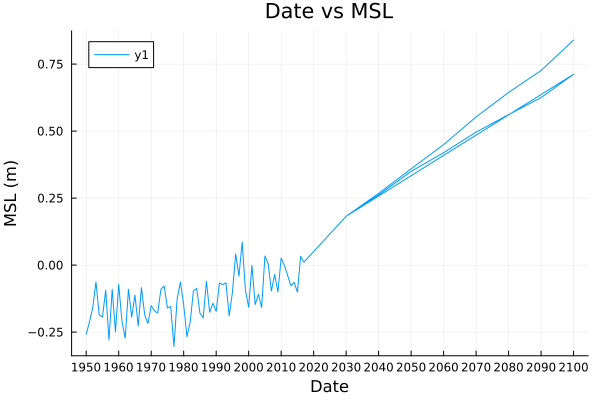

In [77]:
plot(msl_2100.Date, msl_2100."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))

In [78]:
msl_2030

84×2 DataFrame
 Row │ Date        MSL       
     │ Date        Float64   
─────┼───────────────────────
   1 │ 1950-01-01  -0.258
   2 │ 1951-01-01  -0.212
   3 │ 1952-01-01  -0.16
   4 │ 1953-01-01  -0.063
   5 │ 1954-01-01  -0.185
   6 │ 1955-01-01  -0.194
   7 │ 1956-01-01  -0.093
   8 │ 1957-01-01  -0.279
  ⋮  │     ⋮           ⋮
  78 │ 2040-01-01   0.267674
  79 │ 2050-01-01   0.359364
  80 │ 2060-01-01   0.449517
  81 │ 2070-01-01   0.553089
  82 │ 2080-01-01   0.644424
  83 │ 2090-01-01   0.726162
  84 │ 2100-01-01   0.839708
              69 rows omitted

## Should I convert historical data to be per decade? this is this last

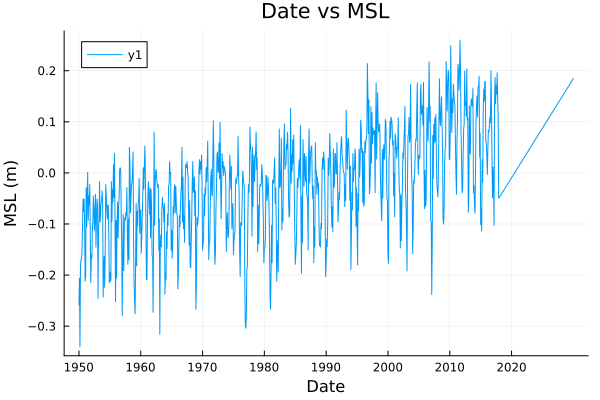

In [79]:
# look I added 2030 data
plot(history_simple.Date, history_simple."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))

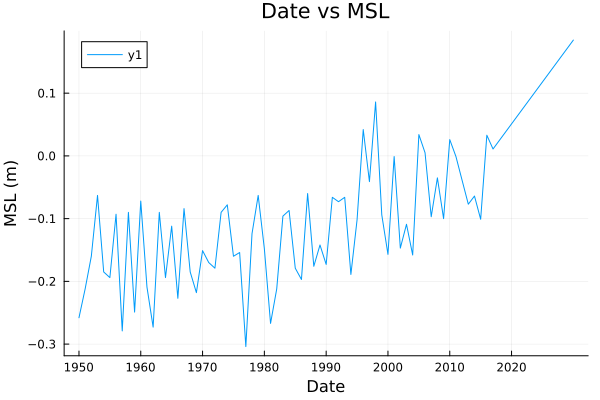

In [80]:
decades_df = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
plot(decades_df.Date, decades_df."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))

# starting again.

In [43]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  
rename!(history, Symbol("MSL (m)") => :MSL)
plot(history.Date, history."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))
history_simple = select(history, :Date, :("MSL"))
decades_df = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
plot(decades_df.Date, decades_df."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))
decades_df_good = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_med = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_bad = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_eq = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple);

In [44]:
decades_df_good = nmc(mixture_model_2030_good, decades_df_good, 2030)
decades_df_good = nmc(mixture_model_2040_good, decades_df_good, 2040)
decades_df_good = nmc(mixture_model_2050_good, decades_df_good, 2050)
decades_df_good = nmc(mixture_model_2060_good, decades_df_good, 2060)
decades_df_good = nmc(mixture_model_2070_good, decades_df_good, 2070)
decades_df_good = nmc(mixture_model_2080_good, decades_df_good, 2080)
decades_df_good = nmc(mixture_model_2090_good, decades_df_good, 2090)
decades_df_good = nmc(mixture_model_2100_good, decades_df_good, 2100);

In [81]:
decades_df_med = nmc(mixture_model_2030_med, decades_df_med, 2030)
decades_df_med = nmc(mixture_model_2040_med, decades_df_med, 2040)
decades_df_med = nmc(mixture_model_2050_med, decades_df_med, 2050)
decades_df_med = nmc(mixture_model_2060_med, decades_df_med, 2060)
decades_df_med = nmc(mixture_model_2070_med, decades_df_med, 2070)
decades_df_med = nmc(mixture_model_2080_med, decades_df_med, 2080)
decades_df_med = nmc(mixture_model_2090_med, decades_df_med, 2090)
decades_df_med = nmc(mixture_model_2100_med, decades_df_med, 2100);

In [82]:
decades_df_bad = nmc(mixture_model_2030_bad, decades_df_bad, 2030)
decades_df_bad = nmc(mixture_model_2040_bad, decades_df_bad, 2040)
decades_df_bad = nmc(mixture_model_2050_bad, decades_df_bad, 2050)
decades_df_bad = nmc(mixture_model_2060_bad, decades_df_bad, 2060)
decades_df_bad = nmc(mixture_model_2070_bad, decades_df_bad, 2070)
decades_df_bad = nmc(mixture_model_2080_bad, decades_df_bad, 2080)
decades_df_bad = nmc(mixture_model_2090_bad, decades_df_bad, 2090)
decades_df_bad = nmc(mixture_model_2100_bad, decades_df_bad, 2100);

In [83]:
decades_df_eq = nmc(mixture_model_2030_eq, decades_df_eq, 2030)
decades_df_eq = nmc(mixture_model_2040_eq, decades_df_eq, 2040)
decades_df_eq = nmc(mixture_model_2050_eq, decades_df_eq, 2050)
decades_df_eq = nmc(mixture_model_2060_eq, decades_df_eq, 2060)
decades_df_eq = nmc(mixture_model_2070_eq, decades_df_eq, 2070)
decades_df_eq = nmc(mixture_model_2080_eq, decades_df_eq, 2080)
decades_df_eq = nmc(mixture_model_2090_eq, decades_df_eq, 2090)
decades_df_eq = nmc(mixture_model_2100_eq, decades_df_eq, 2100);

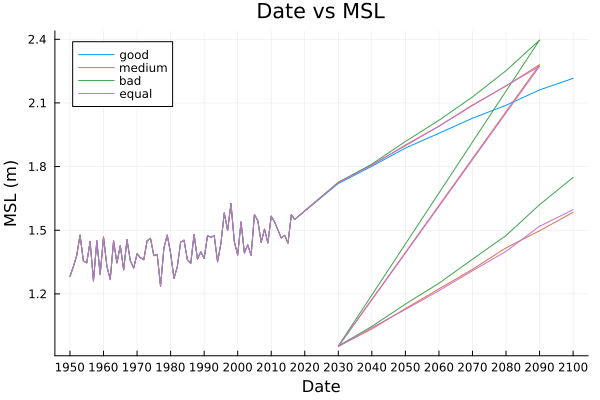

In [88]:
plot(decades_df_good.Date, decades_df_good."MSL", xlabel="Date", ylabel="MSL (m)", label = "good", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))
plot!(decades_df_med.Date, decades_df_med."MSL", xlabel="Date", ylabel="MSL (m)", label = "medium", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))
plot!(decades_df_bad.Date, decades_df_bad."MSL", xlabel="Date", ylabel="MSL (m)", label = "bad", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))
plot!(decades_df_eq.Date, decades_df_eq."MSL", xlabel="Date", ylabel="MSL (m)", label = "equal", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))

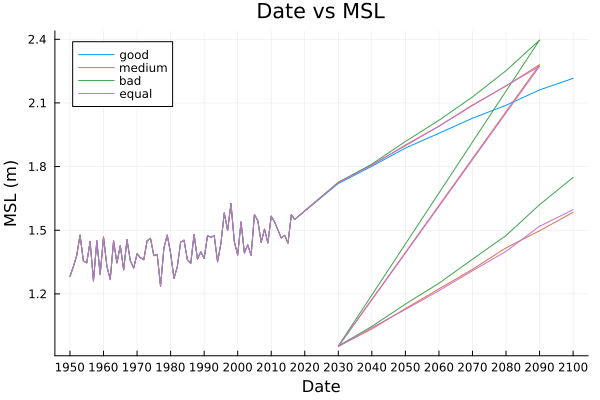

In [85]:
# Shift all "MSL" values by 0.77 m
decades_df_good."MSL" .+= 0.77
decades_df_med."MSL" .+= 0.77
decades_df_bad."MSL" .+= 0.77
decades_df_eq."MSL" .+= 0.77

# Plot the data
plot(decades_df_good.Date, decades_df_good."MSL", xlabel="Date", ylabel="MSL (m)", label="good", title="Date vs MSL", 
     xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))

plot!(decades_df_med.Date, decades_df_med."MSL", xlabel="Date", ylabel="MSL (m)", label="medium", title="Date vs MSL", 
      xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))

plot!(decades_df_bad.Date, decades_df_bad."MSL", xlabel="Date", ylabel="MSL (m)", label="bad", title="Date vs MSL", 
      xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))

plot!(decades_df_eq.Date, decades_df_eq."MSL", xlabel="Date", ylabel="MSL (m)", label="equal", title="Date vs MSL", 
      xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100)))


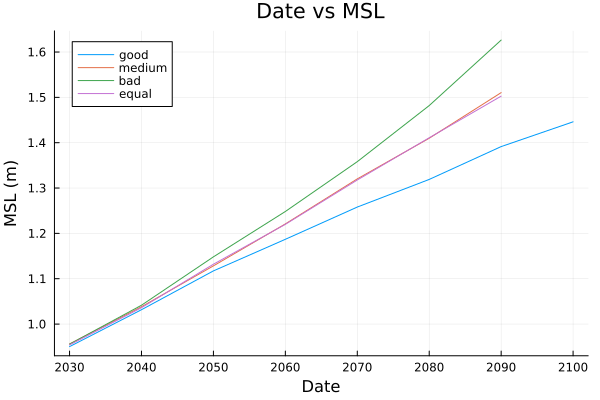

In [50]:
# Filter data for 2020 and later
filtered_good = filter(row -> row.Date >= Date(2030, 01, 01), decades_df_good)
filtered_med = filter(row -> row.Date >= Date(2030, 01, 01), decades_df_med)
filtered_bad = filter(row -> row.Date >= Date(2030, 01, 01), decades_df_bad)
filtered_eq = filter(row -> row.Date >= Date(2030, 01, 01), decades_df_eq)



# Plot the filtered data
plot(
    filtered_good.Date, filtered_good."MSL",
    xlabel="Date", ylabel="MSL (m)", label="good", title="Date vs MSL",
    xticks=(collect(Date(2030, 1, 1):Year(10):Date(2100, 1, 1)), string.(2030:10:2100))
)

plot!(
    filtered_med.Date, filtered_med."MSL",
    xlabel="Date", ylabel="MSL (m)", label="medium", title="Date vs MSL",
    xticks=(collect(Date(2030, 1, 1):Year(10):Date(2100, 1, 1)), string.(2030:10:2100))
)
plot!(
    filtered_bad.Date, filtered_bad."MSL",
    xlabel="Date", ylabel="MSL (m)", label="bad", title="Date vs MSL",
    xticks=(collect(Date(2030, 1, 1):Year(10):Date(2100, 1, 1)), string.(2030:10:2100))
)
plot!(
    filtered_eq.Date, filtered_eq."MSL",
    xlabel="Date", ylabel="MSL (m)", label="equal", title="Date vs MSL",
    xticks=(collect(Date(2030, 1, 1):Year(10):Date(2100, 1, 1)), string.(2030:10:2100))
)


# Nothing below here is needed I'm just not ready to delete

In [51]:

x = 0:0.001:0.4  # Range of x values (sea level rise in meters)
plot(x, pdf.(distributions[1], x), label=slr_2030_df.Scenario[1], lw=2)
for i in 2:length(distributions)
    plot!(x, pdf.(distributions[i], x), label=slr_2030_df.Scenario[i], lw=2)
end

# Add titles and labels
xlabel!("Sea Level Rise (m)")
ylabel!("Density")
title!("Sea Level Rise Projections for 2030 (Distributions)")


UndefVarError: UndefVarError: `distributions` not defined

In [52]:
slr_2100_df = slr_df[slr_df.Year .== 2100, :]
# Calculate mean and standard deviation for each row
slr_2100_df.mean = [mean([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2100_df)]
slr_2100_df.std = [std([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2100_df)]

# Display the updated DataFrame
println(slr_2100_df)


5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std      
     │ Any   Any       Any          Any          Any          Float64   Float64  
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843        0.609667  0.226357
   2 │ 2100  ssp126    0.496        0.667        0.893        0.685333  0.199134
   3 │ 2100  ssp245    0.617        0.814        1.075        0.835333  0.229744
   4 │ 2100  ssp370    0.735        0.93         1.204        0.956333  0.235606
   5 │ 2100  ssp585    0.826        1.036        1.343        1.06833   0.260012


In [53]:
# Calculate mean and standard deviation for each row
slr_2030_df.mean = [mean([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2030_df)]
slr_2030_df.std = [std([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2030_df)]

# Display the updated DataFrame
println(slr_2030_df)


5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std       
     │ Any   Any       Any          Any          Any          Float64   Float64   
─────┼────────────────────────────────────────────────────────────────────────────
   1 │ 2030  ssp119    0.126        0.18         0.241        0.182333  0.0575355
   2 │ 2030  ssp126    0.121        0.182        0.248        0.183667  0.0635164
   3 │ 2030  ssp245    0.119        0.18         0.246        0.181667  0.0635164
   4 │ 2030  ssp370    0.112        0.177        0.246        0.178333  0.0670099
   5 │ 2030  ssp585    0.13         0.184        0.244        0.186     0.0570263


In [54]:

# Define the individual distributions and weights THIS IS 2100
distributions = [
    Normal(0.609667,  0.226357), 
    Normal(0.685333,  0.199134), 
    Normal(0.835333,  0.229744), 
    Normal(0.956333,  0.235606), 
    Normal(1.06833,   0.260012)
]
weights = [3/5, 1/5, 1/5, 0/5, 0/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist_2100_good = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.6000): Normal{Float64}(μ=0.609667, σ=0.226357)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.685333, σ=0.199134)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.835333, σ=0.229744)
components[4] (prior = 0.0000): Normal{Float64}(μ=0.956333, σ=0.235606)
components[5] (prior = 0.0000): Normal{Float64}(μ=1.06833, σ=0.260012)


In [55]:
using DataFrames
using Distributions

function mix_distributions(df::DataFrame, weights::Vector{Float64})
    # Ensure the number of weights matches the number of rows in the DataFrame
    if length(weights) != nrow(df)
        error("Number of weights must match the number of rows in the DataFrame.")
    end
    
    # Extract mean and std from the DataFrame
    means = df.mean
    stds = df.std
    
    # Create a vector of Normal distributions
    distributions = [Normal(mean, std) for (mean, std) in zip(means, stds)]
    
    # Create the mixture model
    mixture_model = MixtureModel(distributions, weights)
    
    return mixture_model
end

# Example usage
slr_2030_df = DataFrame(
    Year = [2030, 2030, 2030, 2030, 2030],
    Scenario = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"],
    Quantile_17 = [0.126, 0.121, 0.119, 0.112, 0.13],
    Quantile_50 = [0.18, 0.182, 0.18, 0.177, 0.184],
    Quantile_83 = [0.241, 0.248, 0.246, 0.246, 0.244],
    mean = [0.182333, 0.183667, 0.181667, 0.178333, 0.186],
    std = [0.0575355, 0.0635164, 0.0635164, 0.0670099, 0.0570263]
)

weights = [3/5, 1/5, 1/5, 0/5, 0/5]
mixture_model = mix_distributions(slr_2030_df, weights)
println(mixture_model)


MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.6000): Normal{Float64}(μ=0.182333, σ=0.0575355)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.183667, σ=0.0635164)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.181667, σ=0.0635164)
components[4] (prior = 0.0000): Normal{Float64}(μ=0.178333, σ=0.0670099)
components[5] (prior = 0.0000): Normal{Float64}(μ=0.186, σ=0.0570263)



In [56]:

# Define the individual distributions and weights THIS IS 2100
distributions = [
    Normal(0.609667,  0.226357), 
    Normal(0.685333,  0.199134), 
    Normal(0.835333,  0.229744), 
    Normal(0.956333,  0.235606), 
    Normal(1.06833,   0.260012)
]
weights = [0/5, 0/5, 1/5, 1/5, 3/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist_2100_bad = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.0000): Normal{Float64}(μ=0.609667, σ=0.226357)
components[2] (prior = 0.0000): Normal{Float64}(μ=0.685333, σ=0.199134)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.835333, σ=0.229744)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.956333, σ=0.235606)
components[5] (prior = 0.6000): Normal{Float64}(μ=1.06833, σ=0.260012)


In [57]:
# Define the individual distributions and weights THIS IS 2030
distributions = [
    Normal(0.182333, 0.0575355), 
    Normal(0.183667, 0.0635164), 
    Normal(0.181667, 0.0635164), 
    Normal(0.178333, 0.0670099), 
    Normal(0.186, 0.0570263)
]
weights = [3/5, 1/5, 1/5, 0/5, 0/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.6000): Normal{Float64}(μ=0.182333, σ=0.0575355)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.183667, σ=0.0635164)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.181667, σ=0.0635164)
components[4] (prior = 0.0000): Normal{Float64}(μ=0.178333, σ=0.0670099)
components[5] (prior = 0.0000): Normal{Float64}(μ=0.186, σ=0.0570263)


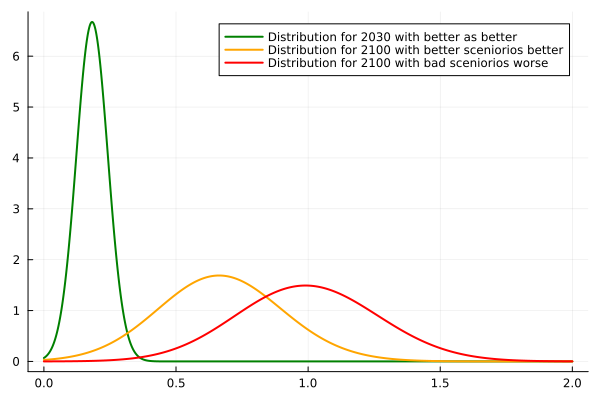

In [58]:
x = 0:0.001:2  # Range of sea level rise in meters
plot(x, pdf.(mixture_dist, x), label="Distribution for 2030 with better as better", lw=2, color=:green)
plot!(x, pdf.(mixture_dist_2100_good, x), label="Distribution for 2100 with better sceniorios better", lw=2, color=:orange)
plot!(x, pdf.(mixture_dist_2100_bad, x), label="Distribution for 2100 with bad sceniorios worse", lw=2, color=:red)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

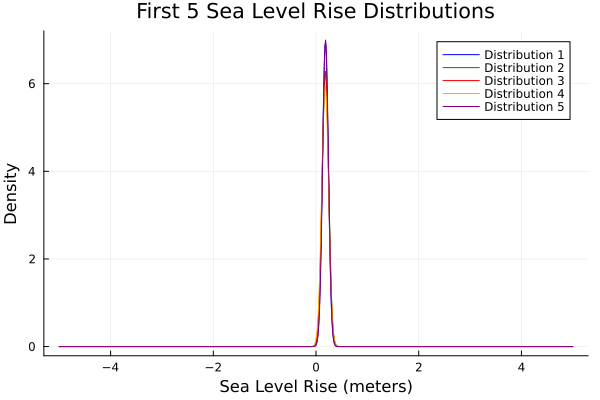

In [59]:
using Plots
using Distributions

# Plot settings
plot_title = "First 5 Sea Level Rise Distributions"
x_range = range(-5, 5; length=1000) # Adjust this range based on expected sea level values
colors = [:blue, :green, :red, :orange, :purple] # Colors for the distributions

# Plot each distribution
plt = plot(title=plot_title, xlabel="Sea Level Rise (meters)", ylabel="Density")
for (i, dist) in enumerate(distributions[1:5])
    y_vals = pdf.(dist, x_range) # Calculate the PDF values
    print(y_vals)
    plot!(x_range, y_vals, label="Distribution $i", color=colors[i])
end

# Show the plot
display(plt)


In [60]:
Random.seed!(1)

TaskLocalRNG()

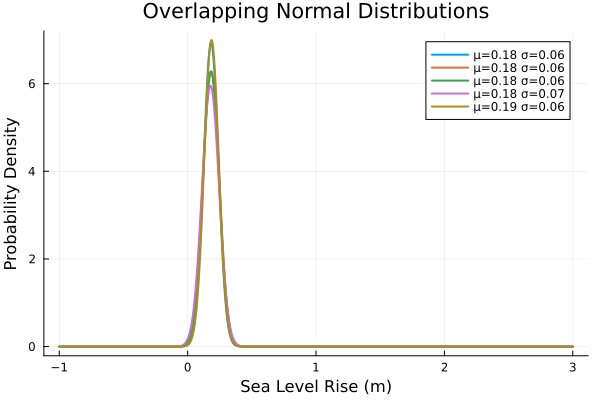

In [61]:
# chat does all of them idk
using Plots
using Distributions

# Create a plot object
p = plot(title="Overlapping Normal Distributions", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

# Define a range for the x-axis
x = range(-1, 3, length=1000)  # Adjust based on expected sea level range

# Loop through distributions and plot their PDFs
for dist in distributions
    # Compute PDF values for each x point
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    # Plot the PDF
    plot!(p, x, pdf_values, lw=2, label="μ=$(round(mean(dist), digits=2)) σ=$(round(std(dist), digits=2))")
end

# Display the plot
display(p)


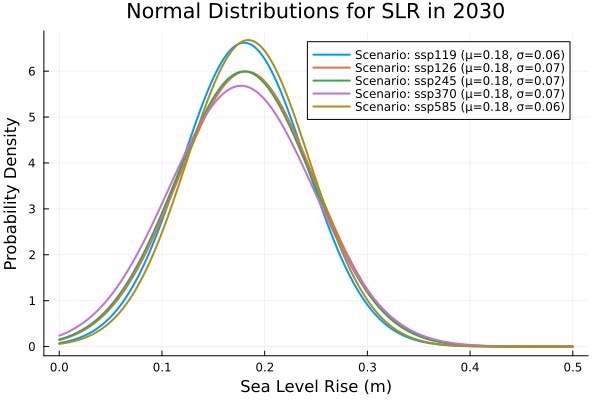

In [62]:
# try year 2030
slr_df_2030 = filter(row -> row.Year == 2030, slr_df)

distributions_2030 = []
for row in eachrow(slr_df_2030)
    μ = row.Quantile_50
    σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
    push!(distributions_2030, Normal(μ, σ))
end


p = plot(title="Normal Distributions for SLR in 2030", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

x = range(0.0, 0.5, length=1000) 


for (i, dist) in enumerate(distributions_2030)
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    scenario = slr_df_2030[i, :Scenario]  # Get scenario label
    plot!(p, x, pdf_values, lw=2, label="Scenario: $scenario (μ=$(round(mean(dist), digits=2)), σ=$(round(std(dist), digits=2)))")
end

display(p)


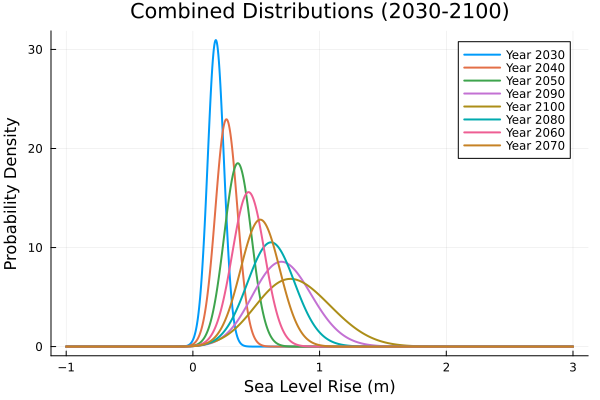

In [63]:
# here edit weights per scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        combined_pdf .+= weights[scenario] * [Distributions.pdf(dist, xi) for xi in x]
    end

    # combined_pdf ./= sum(combined_pdf) * (x[2] - x[1]) # normalizing pdf

    combined_distributions[year] = combined_pdf
end

p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


In [64]:
# trying something else
# println(maximum(combined_distributions[2030]))
some = rand(combined_distributions[2100], 1000)
println(mean(some))

1.30390983320241


## let me here try to sample to build out MSL over time

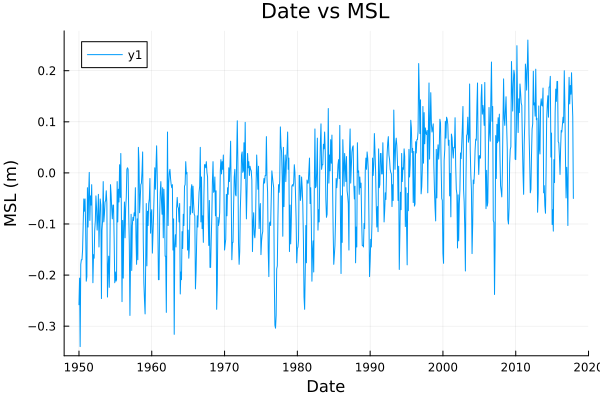

In [65]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  

plot(history.Date, history."MSL (m)", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))


In [66]:

Random.seed!(1)

simulations = 1000
expected_values = []

# Loop through each year and its distribution
for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)


8×2 DataFrame
 Row │ Year   MSL         
     │ Int64  Any         
─────┼────────────────────
   1 │  2030  6.34083e-61
   2 │  2040  1.74073e-41
   3 │  2050  1.88665e-32
   4 │  2060  1.97048e-14
   5 │  2070  2.43902e-10
   6 │  2080  8.1519e-17
   7 │  2090  3.24835e-26
   8 │  2100  8.15961e-21


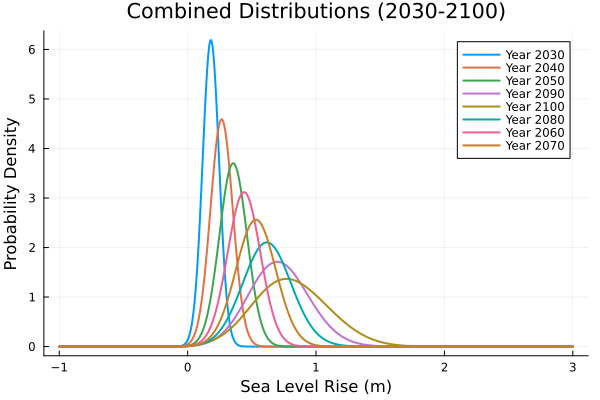

In [67]:
Random.seed!(1)

# Weights for each scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

# Generate combined PDFs for each year
for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        # Calculate the PDF for this distribution at all x points
        pdf_values = [Distributions.pdf(dist, xi) for xi in x]
        
        # Normalize the individual PDF (so that it sums to 1)
        pdf_values ./= sum(pdf_values) * (x[2] - x[1])
        
        # Apply the weight and add to the combined PDF
        combined_pdf .+= weights[scenario] * pdf_values
    end
    
    # Normalize the combined PDF for the year
    combined_pdf ./= sum(combined_pdf) * (x[2] - x[1])  # Normalize to ensure total sum is 1

    combined_distributions[year] = combined_pdf
end

# Plot the combined distributions
p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


**nothing is working from here below**

In [68]:

# Now, simulate the sea level rise for each year (Monte Carlo simulation)
simulations = 1000
expected_values = []

for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)


8×2 DataFrame
 Row │ Year   MSL         
     │ Int64  Any         
─────┼────────────────────
   1 │  2030  1.26817e-61
   2 │  2040  3.48145e-42
   3 │  2050  3.7733e-33
   4 │  2060  3.94096e-15
   5 │  2070  4.87804e-11
   6 │  2080  1.63038e-17
   7 │  2090  6.4967e-27
   8 │  2100  1.63192e-21
